In [226]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw2.ok')

Assignment: hw2
OK, version v1.13.11



# Homework 2: Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization
## Due Date: Friday 7/5, 11:59 PM

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

## Introduction

Bike sharing systems are new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

In this assignment, you will perform tasks to clean, visualize, and explore the bike sharing data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* reading plaintext delimited data into `pandas`
* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots

## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, your plots should be *similar* to the given examples. We will tolerate small variations such as color differences or slight variations in scale. However it is in your best interest to make the plots as similar as possible, as similarity is subject to the readers.

**Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

### Score breakdown



Question | Points
--- | ---
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 2a | 2
Question 2b | 2
Question 2c | 1
Question 2d | 1
Question 2e | 2
Question 2f | 2
Question 3a | 5
Question 3b | 3
Question 4  | 2
Question 5a | 2
Question 5b | 2
Question 6a | 1
Question 6b | 4
Question 6c | 2
Question 6d | 2
Total | 38

In [227]:
# Run this cell to set up your notebook.  Make sure ds100_utils.py is in this assignment's folder
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

## Loading Bike Sharing Data
The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [228]:
# Run this cell to download the data.  No further action is needed

data_url = 'https://github.com/DS-100/sp19/raw/gh-pages/assets/datasets/hw2-bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Wed Jul  3 23:19:17 2019
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data.zip
Extracted Files:
	 data/bikeshare.txt


### Examining the file contents

Can you identify the file format? (No answer required.)

In [229]:
# Run this cell to look at the top of the file.  No further action is needed
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? (No answers required.)

In [230]:
# Run this cell to view some metadata.  No further action is needed
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the data

The following code loads the data into a Pandas DataFrame.

In [231]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [232]:
bike.shape

(17379, 17)

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

**Note:** If you want to revert changes, run the cell that reloads the csv.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.
<!--
BEGIN QUESTION
name: q1a
points: 2
-->

In [233]:
# Modify holiday weekday, workingday, and weathersit her
bike = bike.replace({'holiday': {0: 'no', 1: 'yes'}})
bike = bike.replace({'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}}) 
bike = bike.replace({'workingday': {0: 'no', 1: 'yes'}})
bike = bike.replace({'weathersit': {0: 'Clear', 1: 'Mist', 2: 'Light', 3: 'Heavy'}}) 
bike 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Mist,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Mist,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Mist,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Mist,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Mist,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,no,Sat,no,Light,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,no,Sat,no,Mist,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,no,Sat,no,Mist,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,no,Sat,no,Mist,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,no,Sat,no,Mist,0.32,0.3485,0.76,0.0000,8,6,14


In [234]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.
<!--
BEGIN QUESTION
name: q1b
points: 1
-->

In [235]:
num_holidays = bike['holiday'].value_counts()['yes']
num_holidays

500

In [236]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.
<!--
BEGIN QUESTION
name: q1c
points: 2
-->

In [237]:
#daily_counts = ...nn
def countcasual(series):
    casual_hour = sum(series['casual'])
    return casual_hour
def register(series):
    commit_hour = sum(series['registered'])
    return commit_hour
#bike
index = bike.groupby('dteday').agg(countcasual).index
all_casual = bike.groupby('dteday').agg(countcasual)['casual'].values
all_commit = bike.groupby('dteday').agg(register).values
working_indenty= bike.groupby('dteday').first()['workingday'].values


3
# Creating an empty Dataframe with column names only
daily_counts = pd.DataFrame(columns=['casual', 'registered', 'workingday'])
daily_counts['casual'] = all_casual
daily_counts['registered'] = all_commit
daily_counts['workingday'] = working_indenty
daily_counts.index = index
daily_counts



,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes
2011-01-06,88,1518,yes
2011-01-07,148,1362,yes
2011-01-08,68,891,no
2011-01-09,54,768,no


In [238]:
ok.grade("q1c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



---
## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 2
#### Question 2a

Use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) function to create a plot that overlays the distribution of the daily counts of `casual` and `registered` users. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

<img src='images/casual_v_registered.png' width="600px" />

<!--
BEGIN QUESTION
name: q2a
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

TypeError: 'str' object is not callable

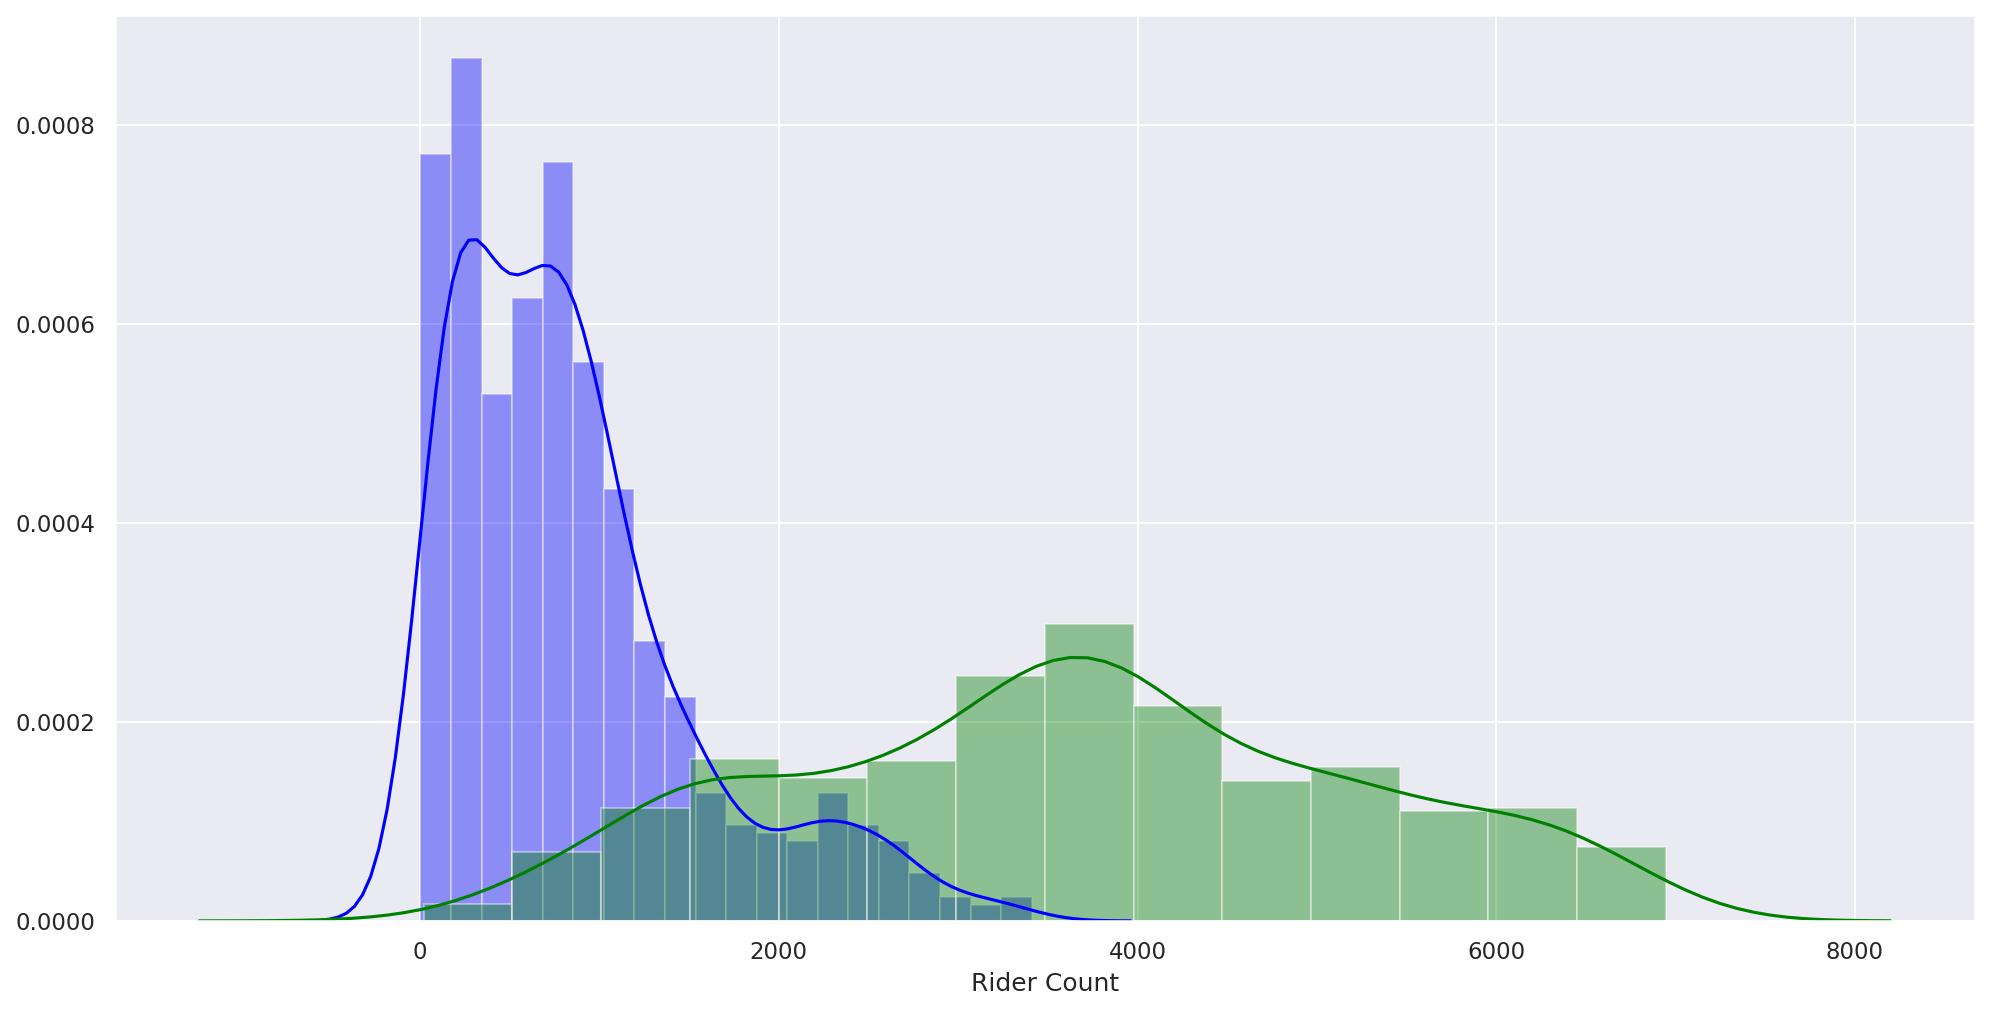

In [239]:
sns.distplot(daily_counts['casual'],label = 'casual',color = 'blue')
sns.distplot(daily_counts['registered'],axlabel = 'Rider Count',label = 'registered',color = 'green')
plt.xlabel('Rider Count')
plt.ylabel('Density')
plt.title('Distribution Comparison of Casual vs Registered Riders')
plt.legend()



### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 
<!--
BEGIN QUESTION
name: q2b
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

For both the density curves for casual and registered riders, there are no gaps and rarely outliers for either of the two curves. However, the density curves for casual riders are not tailed and is skewed to the left. Meanwhile, the density curve for registered riders is pretty symmetry. And the modes for casual density count is way lower than the modes for the registered rider counts

## Ethical Considerations

City planners, transportation agencies, and policy makers have started to collaborate with bike sharing companies in order to reduce congestion and transportation costs. Recently city planners and policy makers have also been trying to make transportation more equitable. 

Equity in transportation includes: finding ways to make transportation more accessible to people in all neighborhoods within a given region, making the costs of transportation affordable to people across all income levels, and assessing how inclusive transportation systems are over time. Data about city residents may shed light on how to better assess transportation cost and equity impacts on transportation users. Bearing this in mind, answer the following two questions on the nature of the data, their possible shortcomings, and ethical considerations associated with how we as data scientists use, manipulate, and share this data.  

### Question 2c

In addition to the type of rider (casual vs. registered) and the overall count of each, what other kinds of demographic data would be useful (e.g. identity, neighborhood, monetary expenses, etc.)? 

What is an example of a privacy or consent issue that could occur when accessing the demographic data you brought up in the previous question?

<!--
BEGIN QUESTION
name: q2c
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

I think some of the useful demographic data would be ethinicity, neighborhood and monetary expense. Because different ethinicity groups tend to have different pattern on saving and spending money. Same things goes to the monetary expense as well. Higher class with more income have more moeny to spend so they might be more likely to drive or uber rather than rides. So adding the monetary expenses and ethnicity might help us analyze the data better. 

### Question 2d

What is an example of a privacy or consent issue that could occur when accessing the demographic data you brought up in the previous question?

<!--
BEGIN QUESTION
name: q2d
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

Monetary expense is closely related to income so it might be a sensitive subject and people might feel being offended when being ask for their ethnicity or monetary expense when people are trying to accessing this demographic data. Especially in a lot the questionarie, we won't even see a column where it ask how much people earn and the ethinicty column if often optional.

### Question 2e

The density plots do not show us how the counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line (just as you saw in Data 8). Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. Make sure to include a title.

<img src='images/casual_registered_working_nonworking.png' width="600px" />

**Hints:** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws`.

<!--
BEGIN QUESTION
name: q2e
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

In [ ]:
# Make the font size a bit bigger
sns.set(font_scale=1.5)
#sns.set_
#noworkingdayc = bike.loc[bike['workingday'] == 'no']['casual']
#noworkingdayr = bike.loc[bike['workingday'] == 'no']['registered']
#yesworkingdayc = bike.loc[bike['workingday'] == 'yes']['casual']
#yesworkingdayr = bike.loc[bike['workingday'] == 'yes']['registered']
#x_bines = np.arange(0,400,50).tolist()
#x_bines
sns.lmplot(x="casual", y="registered", hue="workingday",fit_reg=True,data=bike,scatter_kws={'s':10} );
plt.title('Comparasion of Casual vs Registered Riders on Working and Non-working Days')
#sns.set(font_scale=1.5)

#...

### Question 2f

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does [overplotting](http://www.textbook.ds100.org/ch/06/viz_principles_2.html) have on your ability to describe this relationship?

<!--
BEGIN QUESTION
name: q2f
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

From where most of those two types of dots are location on xaxis and yaxis, we can tell that during the working days, more people tend to use regiestered bike ride while at during the weekend, more people are tend to go on casual bike ride instead of registered rides. Overplotting make us impossible to see where exactly the point is located. In this graph, overplotting make it impossible for us to find out in weekend, whats the comparasion of casual and registered bike ride when the casual bike ride hours are really low.

---
## 3: Visualization

### Question 3

#### Question 3a Bivariate Kernel Density Plot
 
To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

The result we wish to achieve should be a plot that looks like this:

<img src='images/bivariate_kde_of_daily_rider_types.png' width="600px" />

You can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want (see example figure above).

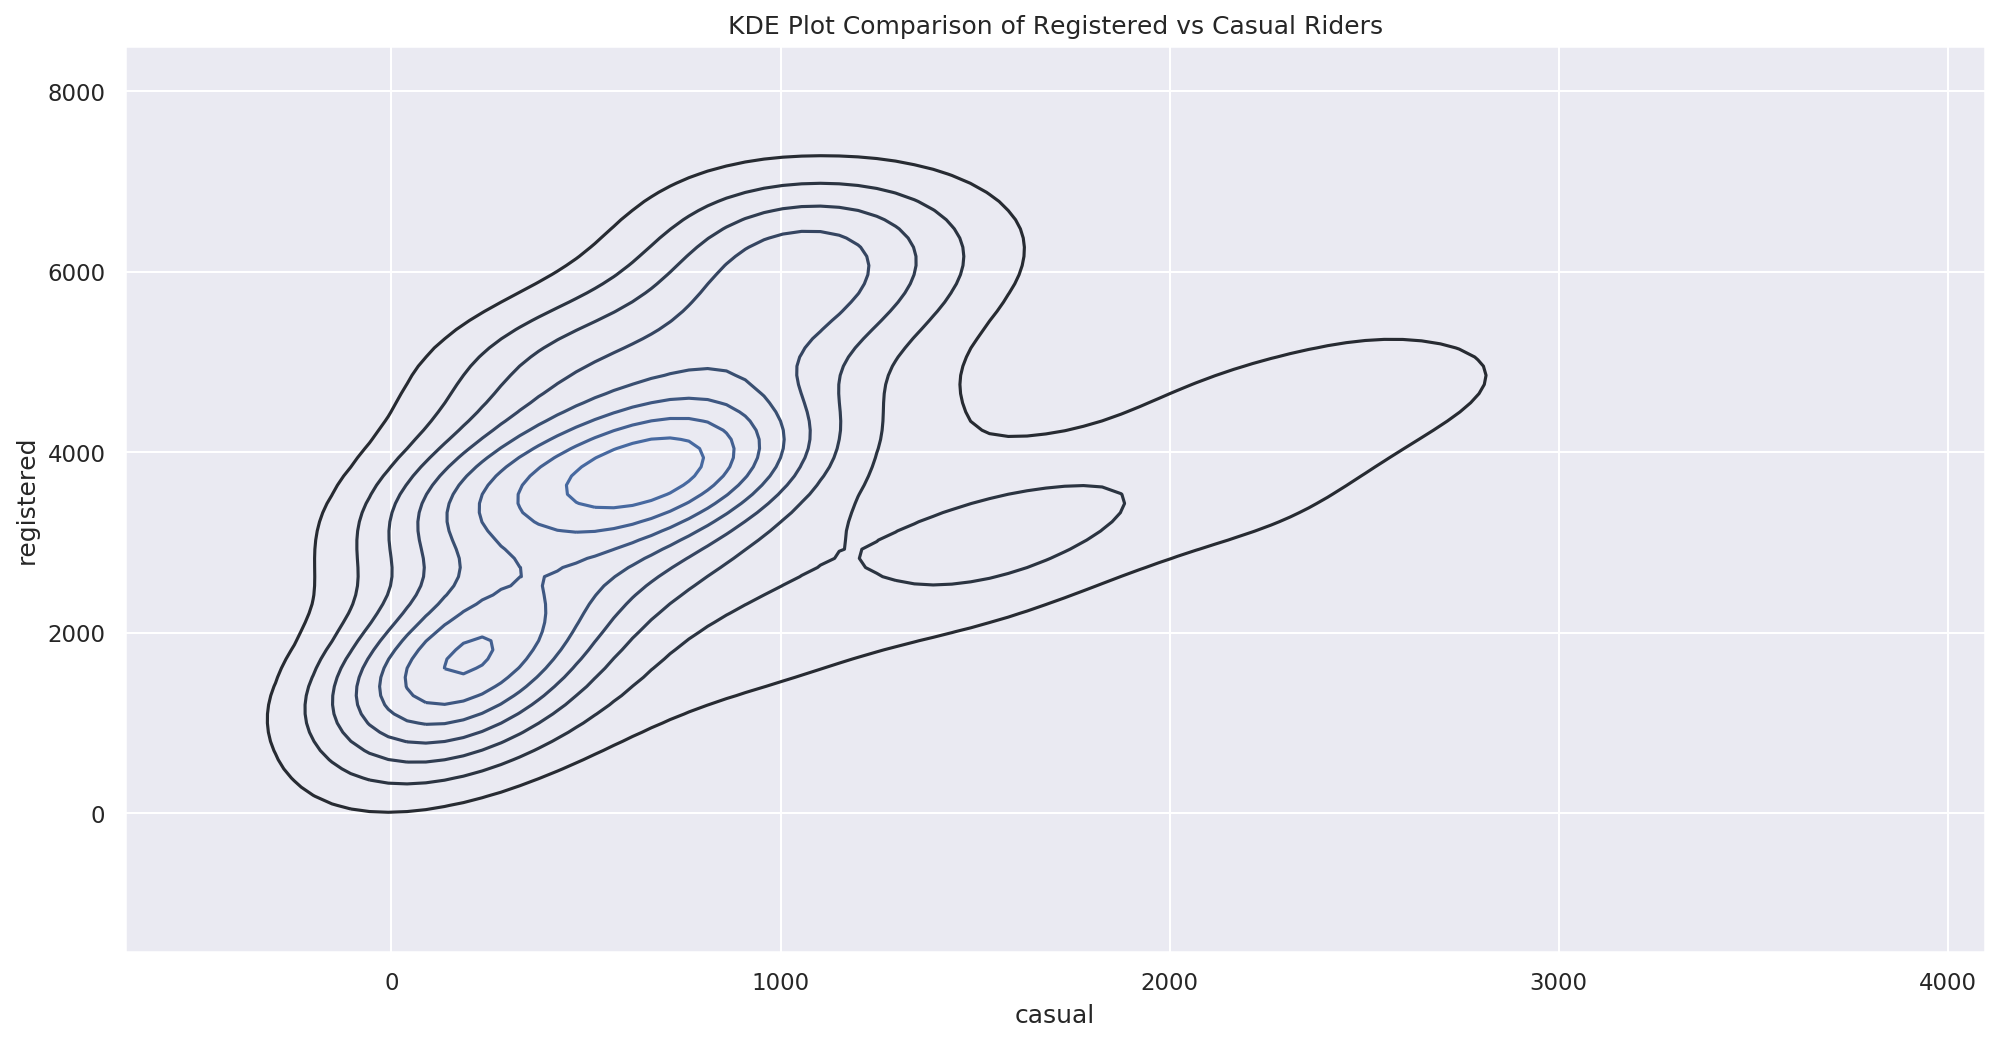

In [240]:
sns.kdeplot(daily_counts['casual'], daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

Generating the plot with weekend and weekday separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

**Hints:** 
* You can use `loc` with a boolean array and column names at the same time
* You will need to call kdeplot twice.
* Check out this [tutorial](http://financeandpython.com/SeabornDataVisualization/8/3.html) to see an example of how to set colors for each dataset and how to create a legend. The legend part uses some weird matplotlib syntax that we haven't learned! You'll probably find creating the legend annoying, but it's a good exercise to learn how to use examples to get the look you want.
* You will want to set the `cmap` parameter of `kdeplot` to `"Reds"` and `"Blues"` (or whatever two contrasting colors you'd like).

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`.
<!--
BEGIN QUESTION
name: q3a
points: 5
manual: true
-->
<!-- EXPORT TO PDF -->

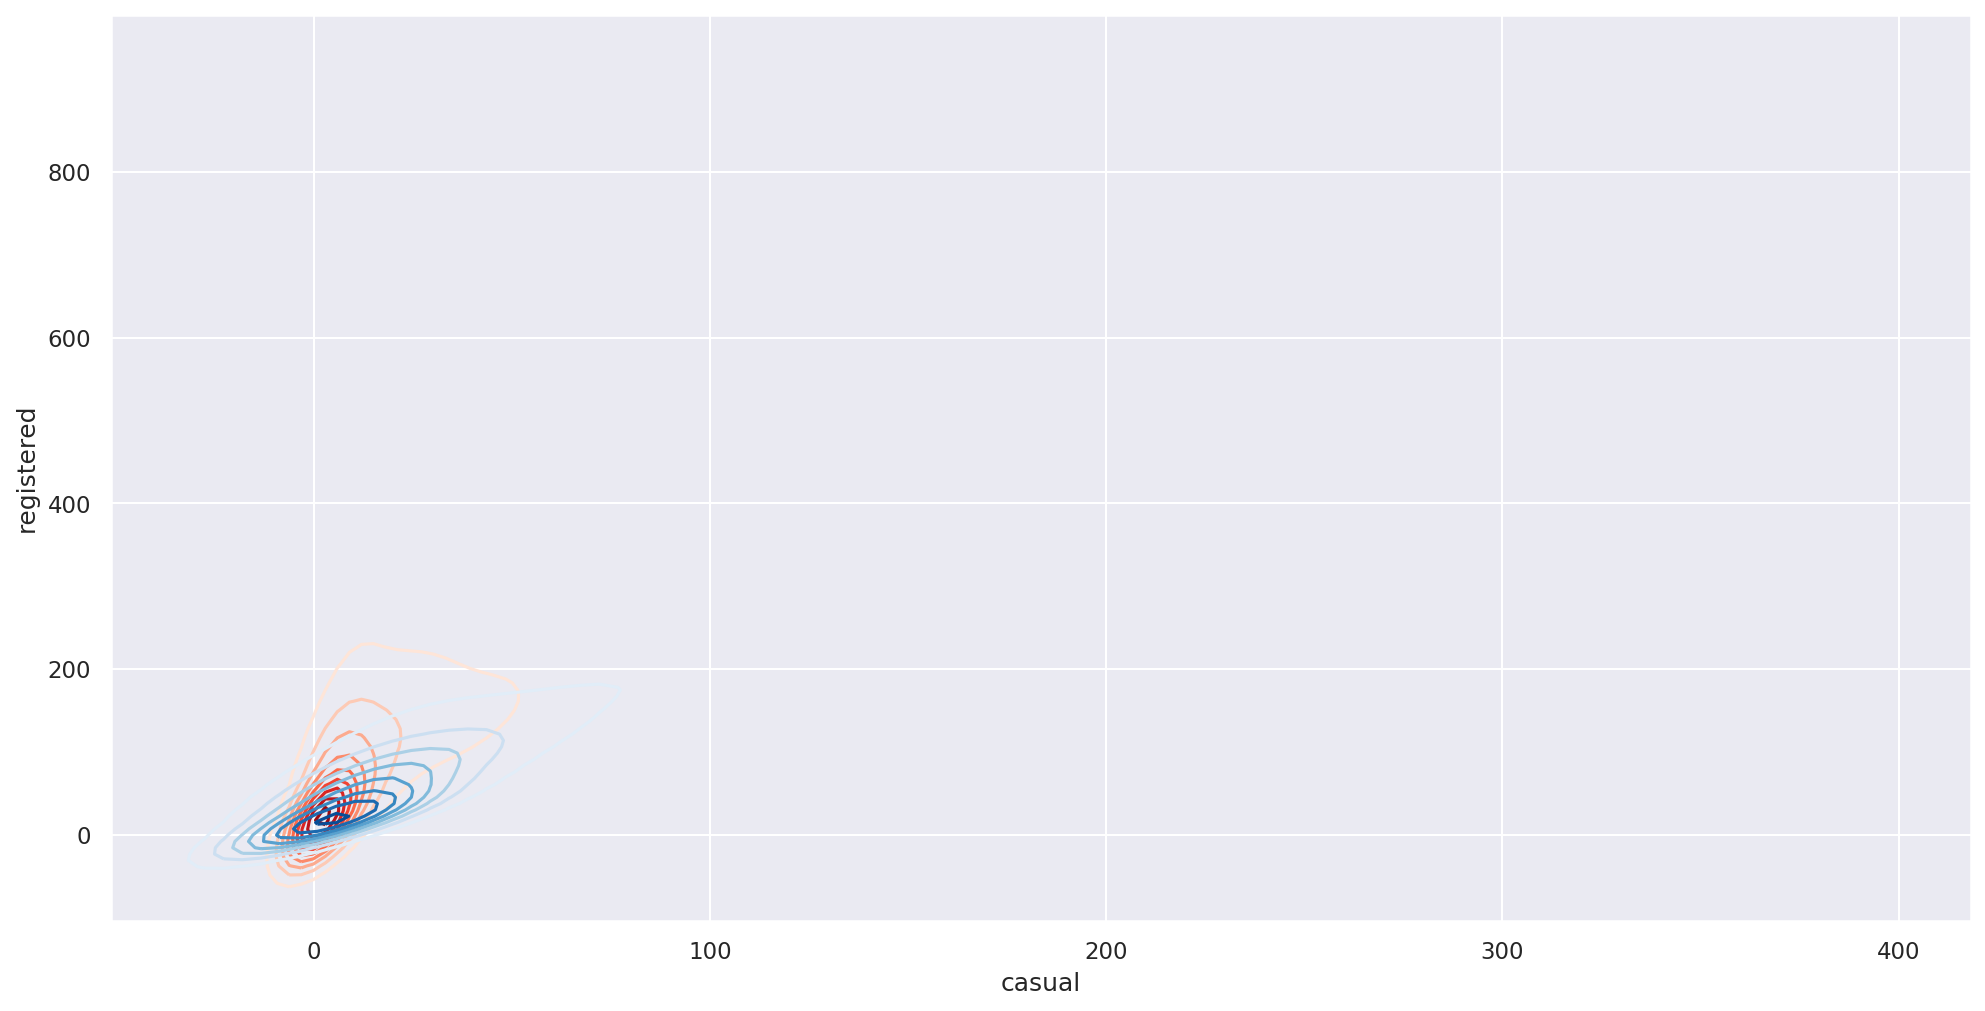

In [241]:
import matplotlib.patches as mpatches  # see the tutorial for how we use mpatches to generate this figure!

# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = bike['workingday'] == 'yes'

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on weekdays
# Hint: use loc and is_workingday to splice out the relevant rows and column (casual/registered). 
casual_weekday = bike.loc[bike['workingday'] == 'yes']['casual']
registered_weekday = bike.loc[bike['workingday'] == 'yes']['registered']


# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
sns.kdeplot(casual_weekday,registered_weekday,cmap = 'Reds')

# Repeat the same steps above but for rows corresponding to non-workingdays
casual_weekend = bike.loc[bike['workingday'] == 'no']['casual']
registered_weekend = bike.loc[bike['workingday'] == 'no']['registered']
#noworkingdayc = bike.loc[bike['workingday'] == 'no']['casual']
#noworkingdayr = bike.loc[bike['workingday'] == 'no']['registered']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
sns.kdeplot(casual_weekend,registered_weekend,cmap = 'Blues')

#### Question 3b

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?

<!--
BEGIN QUESTION
name: q3b
points: 3
manual: true
-->
<!-- EXPORT TO PDF -->

we can see the shape of the relationship for the high density overlapption region that we were not being able to see from the scatter plot because of the overplotting from the scatter plot.

## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).

<img src="images/joint_distribution_of_daily_rider_types.png" width="600px" />

**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.
* `plt.suptitle` from lab 1 can be handy for setting the title where you want.
* `plt.subplots_adjust(top=0.9)` can help if your title overlaps with your plot

<!--
BEGIN QUESTION
name: q4
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

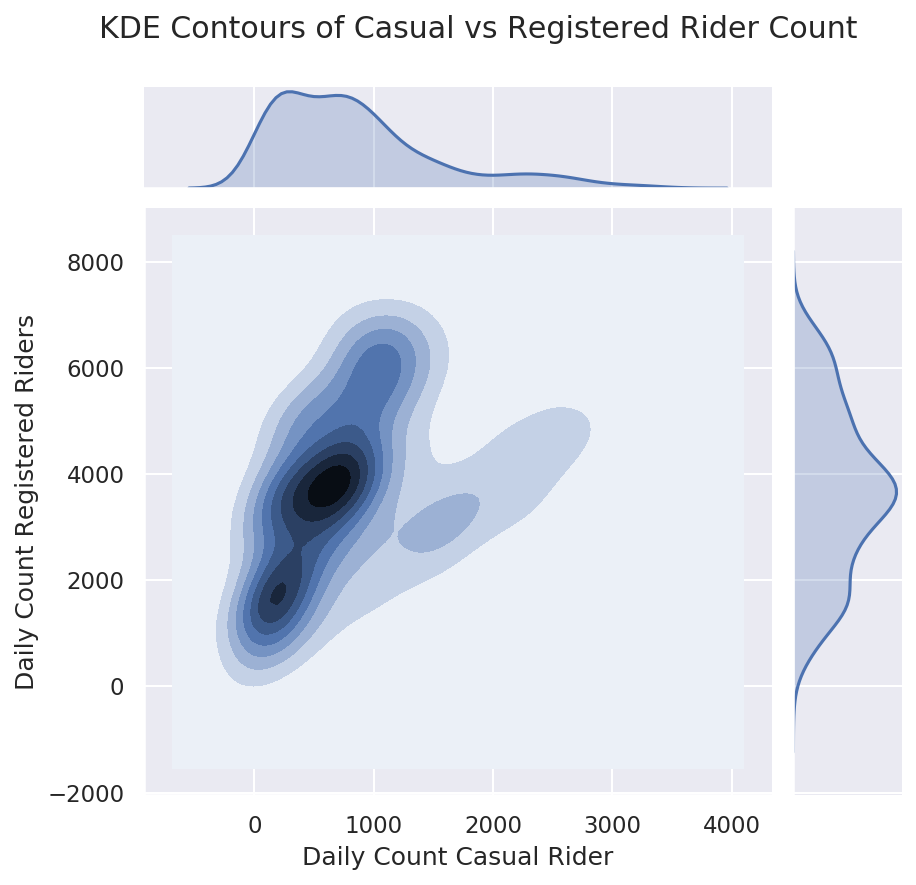

In [242]:
pics1 = sns.jointplot(x="casual", y="registered", data=daily_counts, kind="kde")
pics1 = pics1.set_axis_labels('Daily Count Casual Rider','Daily Count Registered Riders')
plt.suptitle('KDE Contours of Casual vs Registered Rider Count')
#plt.set_axis_labels('Daily Count Casual Riders')
#sns.kdeplot(daily_counts['casual'], daily_counts['registered'])
plt.subplots_adjust(top = 0.9)

---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset**, stratified by rider type.  

Your plot should look like the following:

<img src="images/diurnal_bikes.png" width="600px"/>

<!--
BEGIN QUESTION
name: q5a
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

Text(0.5, 1.0, 'Average Count of Casual vs Registered by Hour')

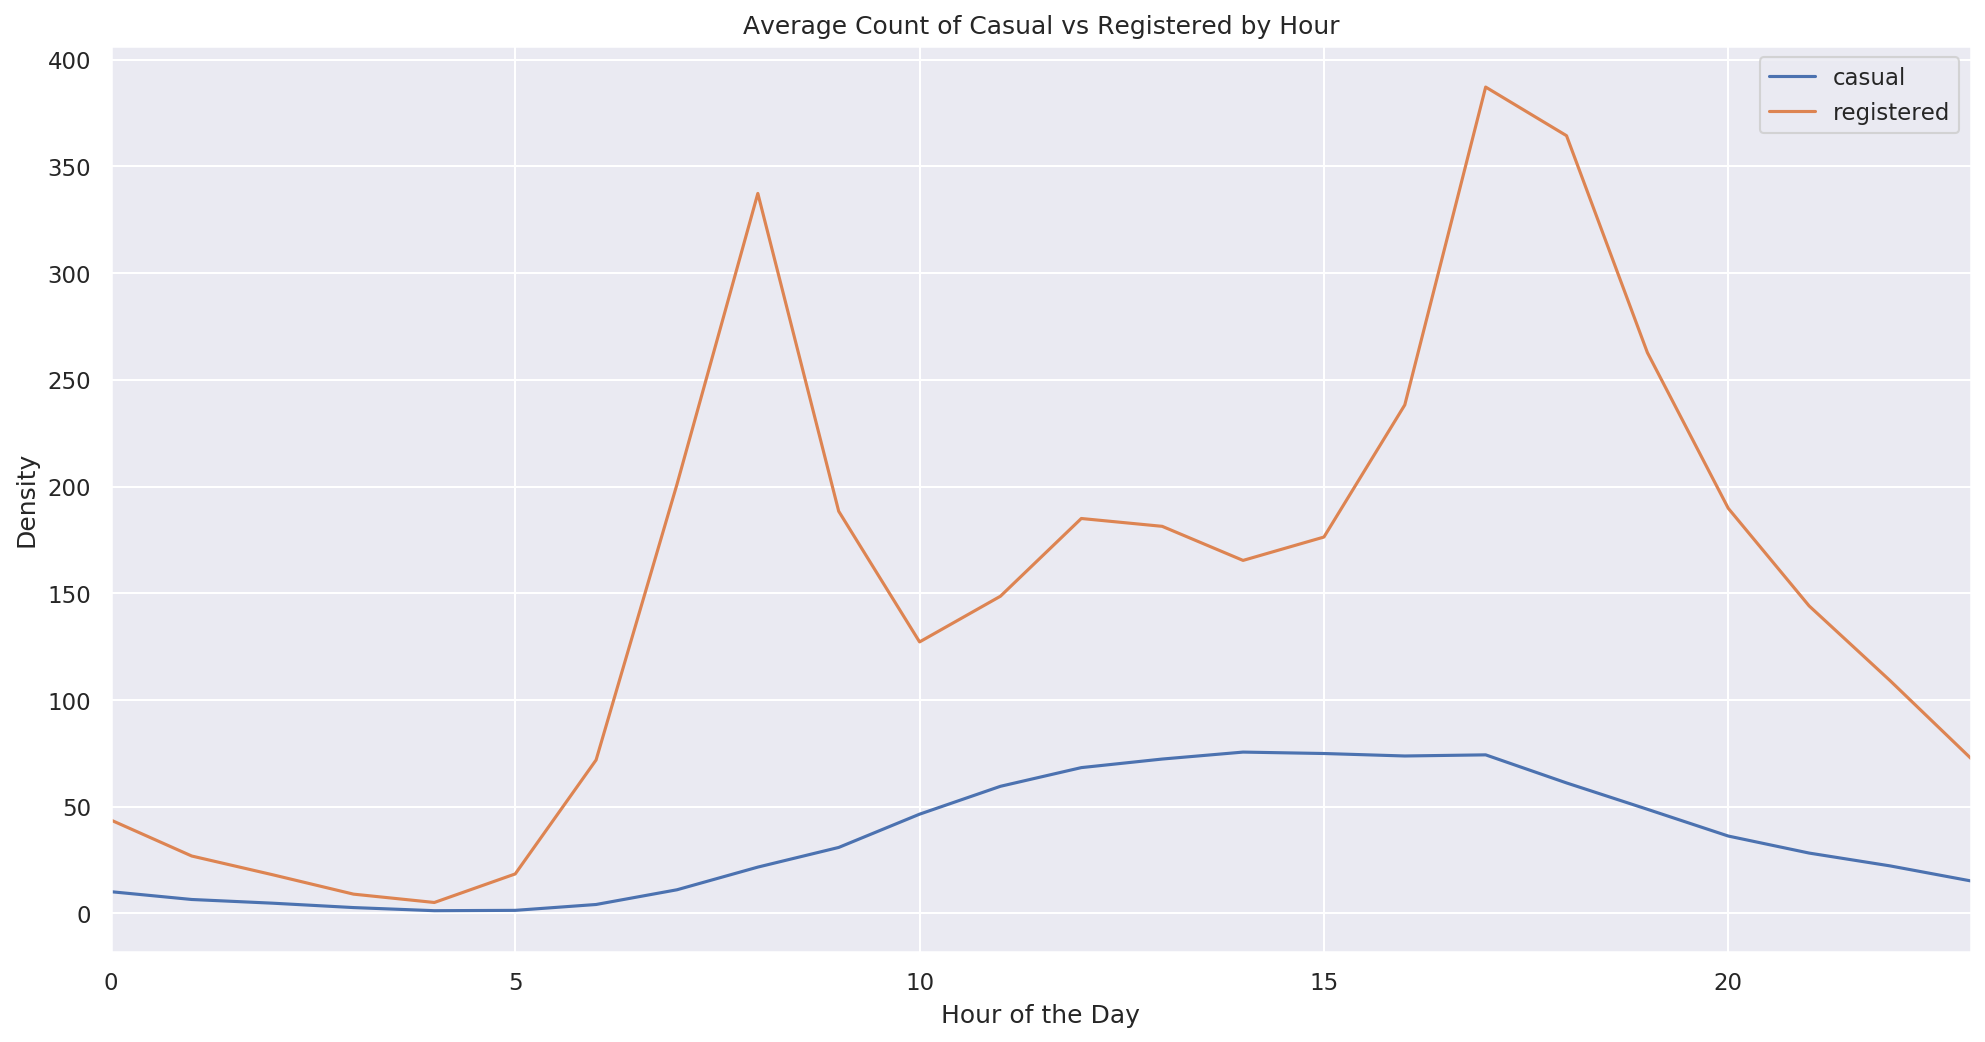

In [243]:
bike1 = bike.groupby('hr')['casual'].mean()
bike2 = bike.groupby('hr')['registered'].mean()
biket = pd.DataFrame(columns=['casual', 'registered'])
biket['casual'] = bike1
biket['registered'] = bike2
biket.index.names = ['Hour of the Day']
biket.plot()
#plt.xlabel('Hour of the Day')
plt.ylabel('Density')

#np.xlabel('hr')
#plt.xlabel('Hour of the Day')
#plt.xlabel('Hour of the Day')
#plt.ylabel('Average Count')
plt.title('Average Count of Casual vs Registered by Hour')
#biket.index = 'Hour of the Day'
#bike


#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered riders' distribution.
<!--
BEGIN QUESTION
name: q5b
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

From this plot, we can oberser that the average density count of register hour is higher then the average density count of the casual hour. Since when we are plotting the data, our y xaxis is the mean value of each hour. The peaks of the registered riders' distribution mean this at hours of the day, it has the most people who are riding the registered bike. 

---
## 6: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders.
<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [244]:
#bike['prop_casual']
#bike
#rider_sum = sum(bike['casual']) + sum(bike['casual'])
bike['prop_casual'] = bike['casual']/bike['cnt']
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Mist,0.24,0.2879,0.81,0.0000,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Mist,0.22,0.2727,0.80,0.0000,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Mist,0.22,0.2727,0.80,0.0000,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Mist,0.24,0.2879,0.75,0.0000,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Mist,0.24,0.2879,0.75,0.0000,0,1,1,0.000000
5,6,2011-01-01,1,0,1,5,no,Sat,no,Light,0.24,0.2576,0.75,0.0896,0,1,1,0.000000
6,7,2011-01-01,1,0,1,6,no,Sat,no,Mist,0.22,0.2727,0.80,0.0000,2,0,2,1.000000
7,8,2011-01-01,1,0,1,7,no,Sat,no,Mist,0.20,0.2576,0.86,0.0000,1,2,3,0.333333
8,9,2011-01-01,1,0,1,8,no,Sat,no,Mist,0.24,0.2879,0.75,0.0000,1,7,8,0.125000
9,10,2011-01-01,1,0,1,9,no,Sat,no,Mist,0.32,0.3485,0.76,0.0000,8,6,14,0.571429


In [245]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6b
In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

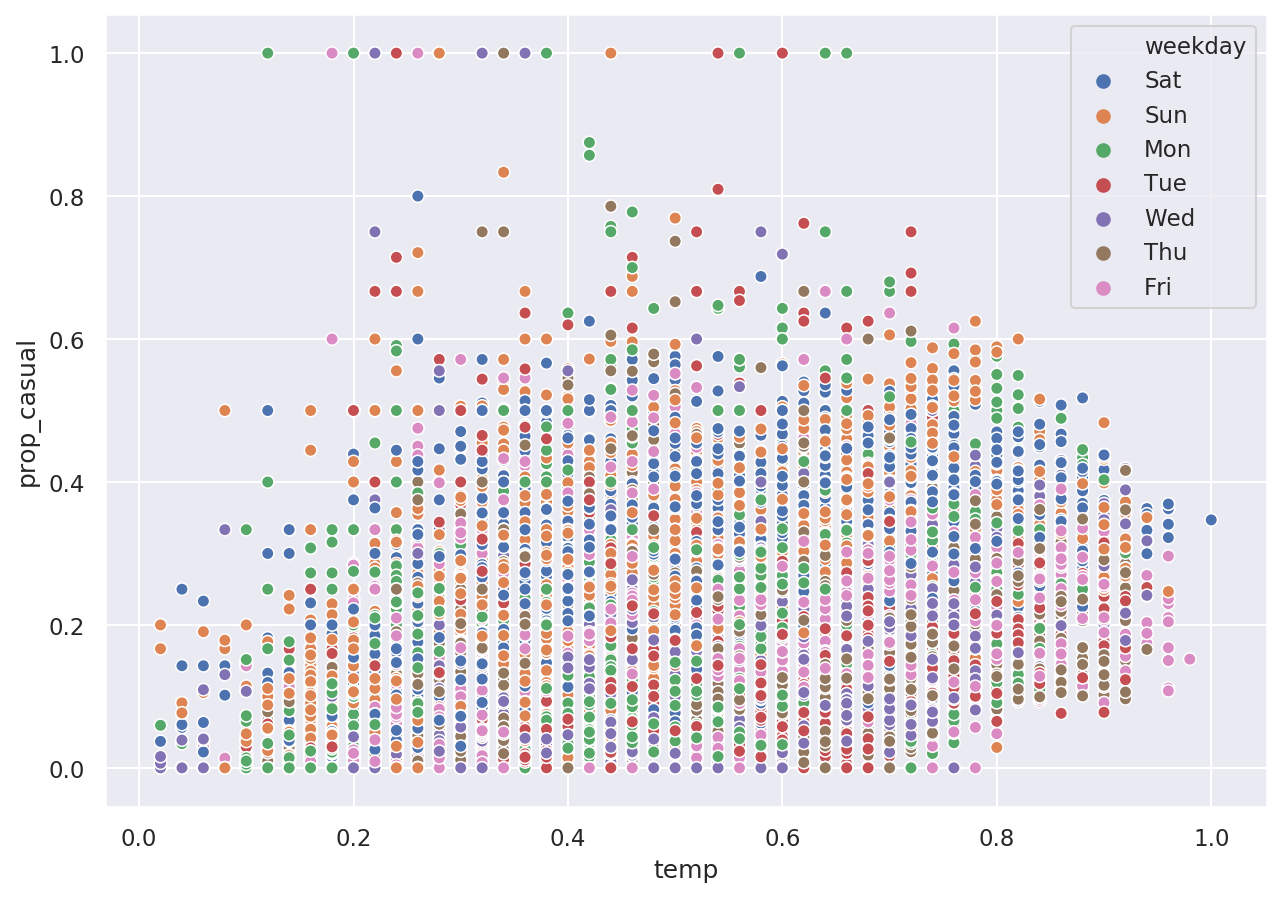

In [246]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

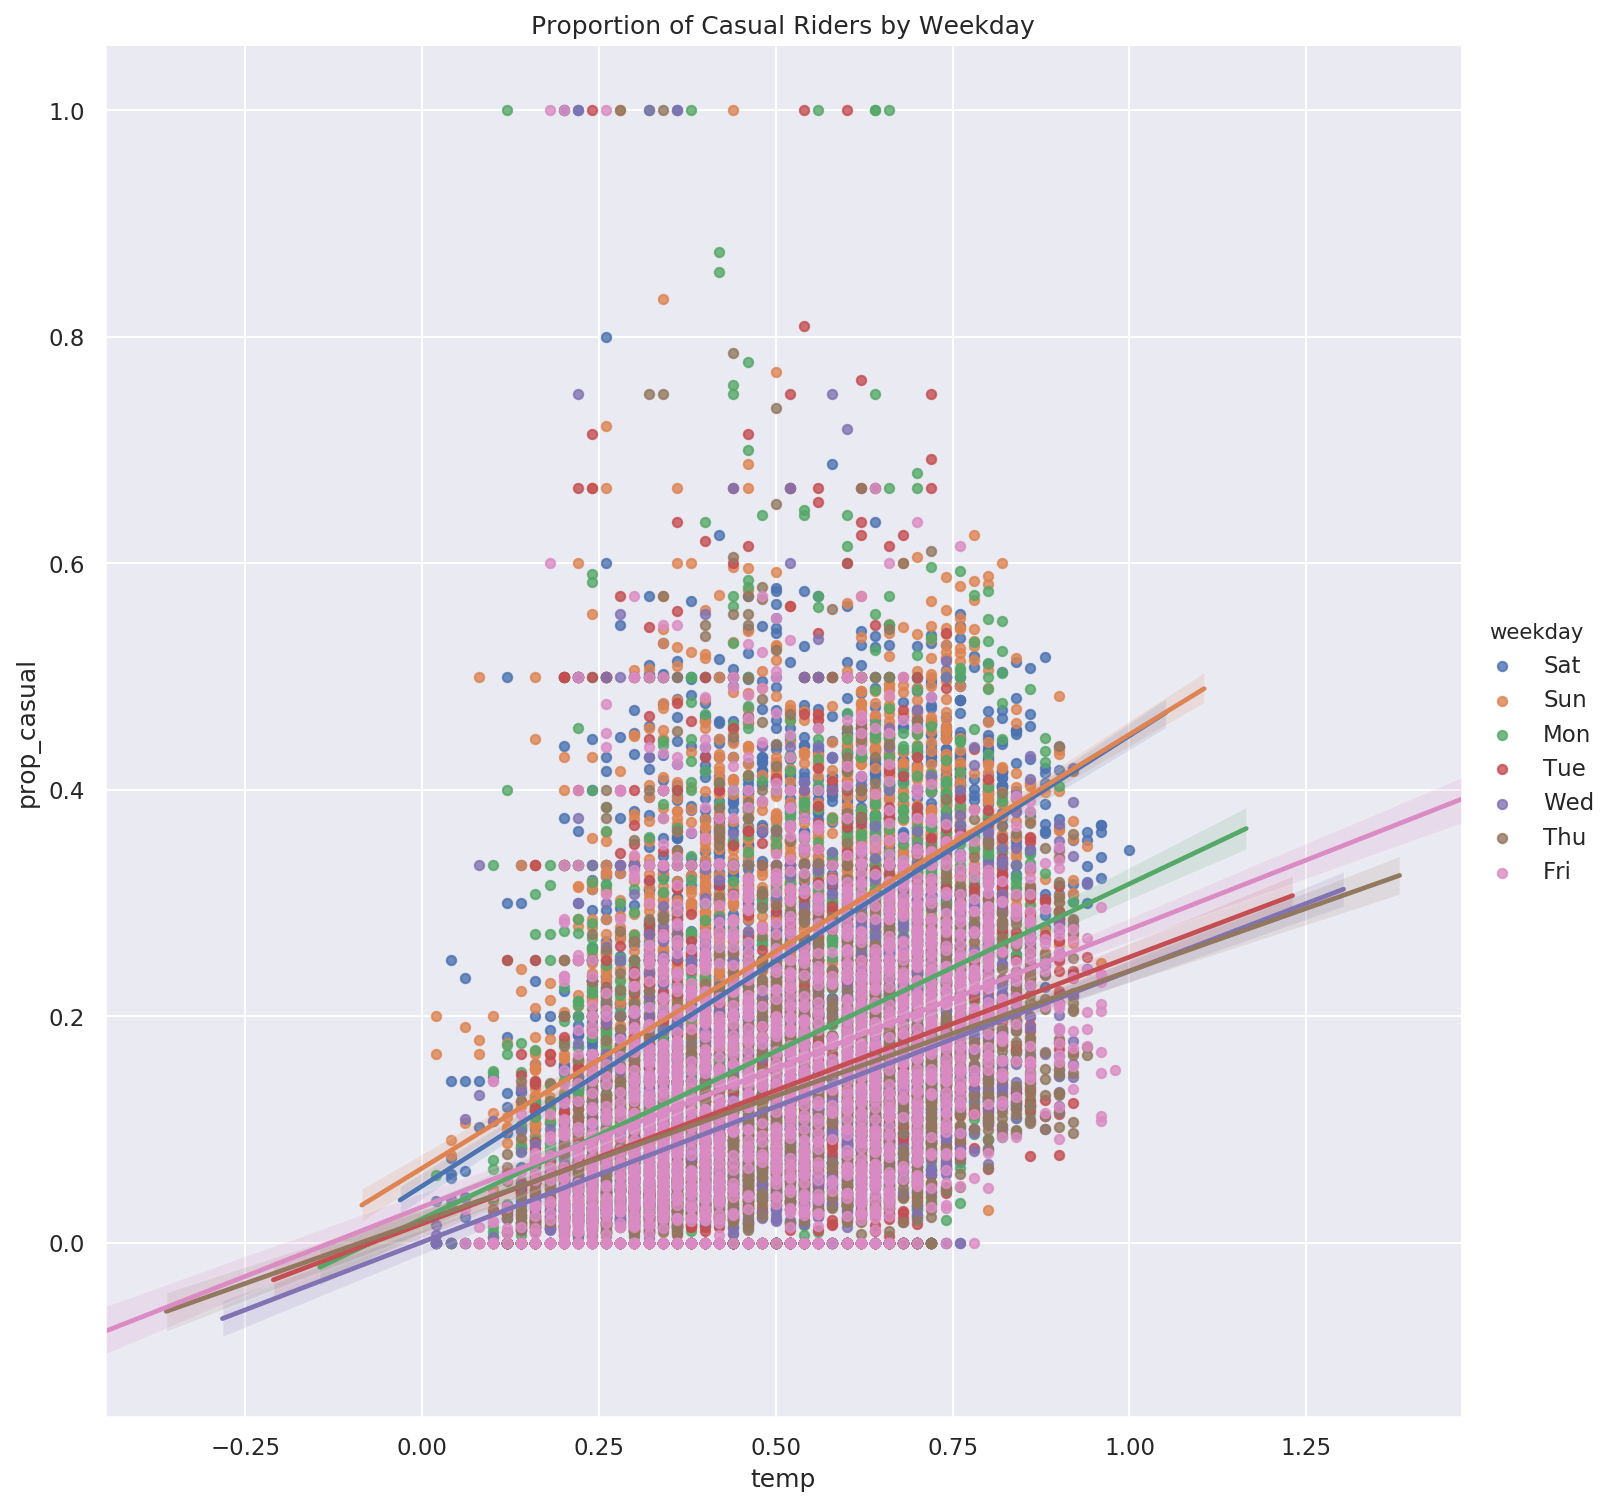

In [247]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

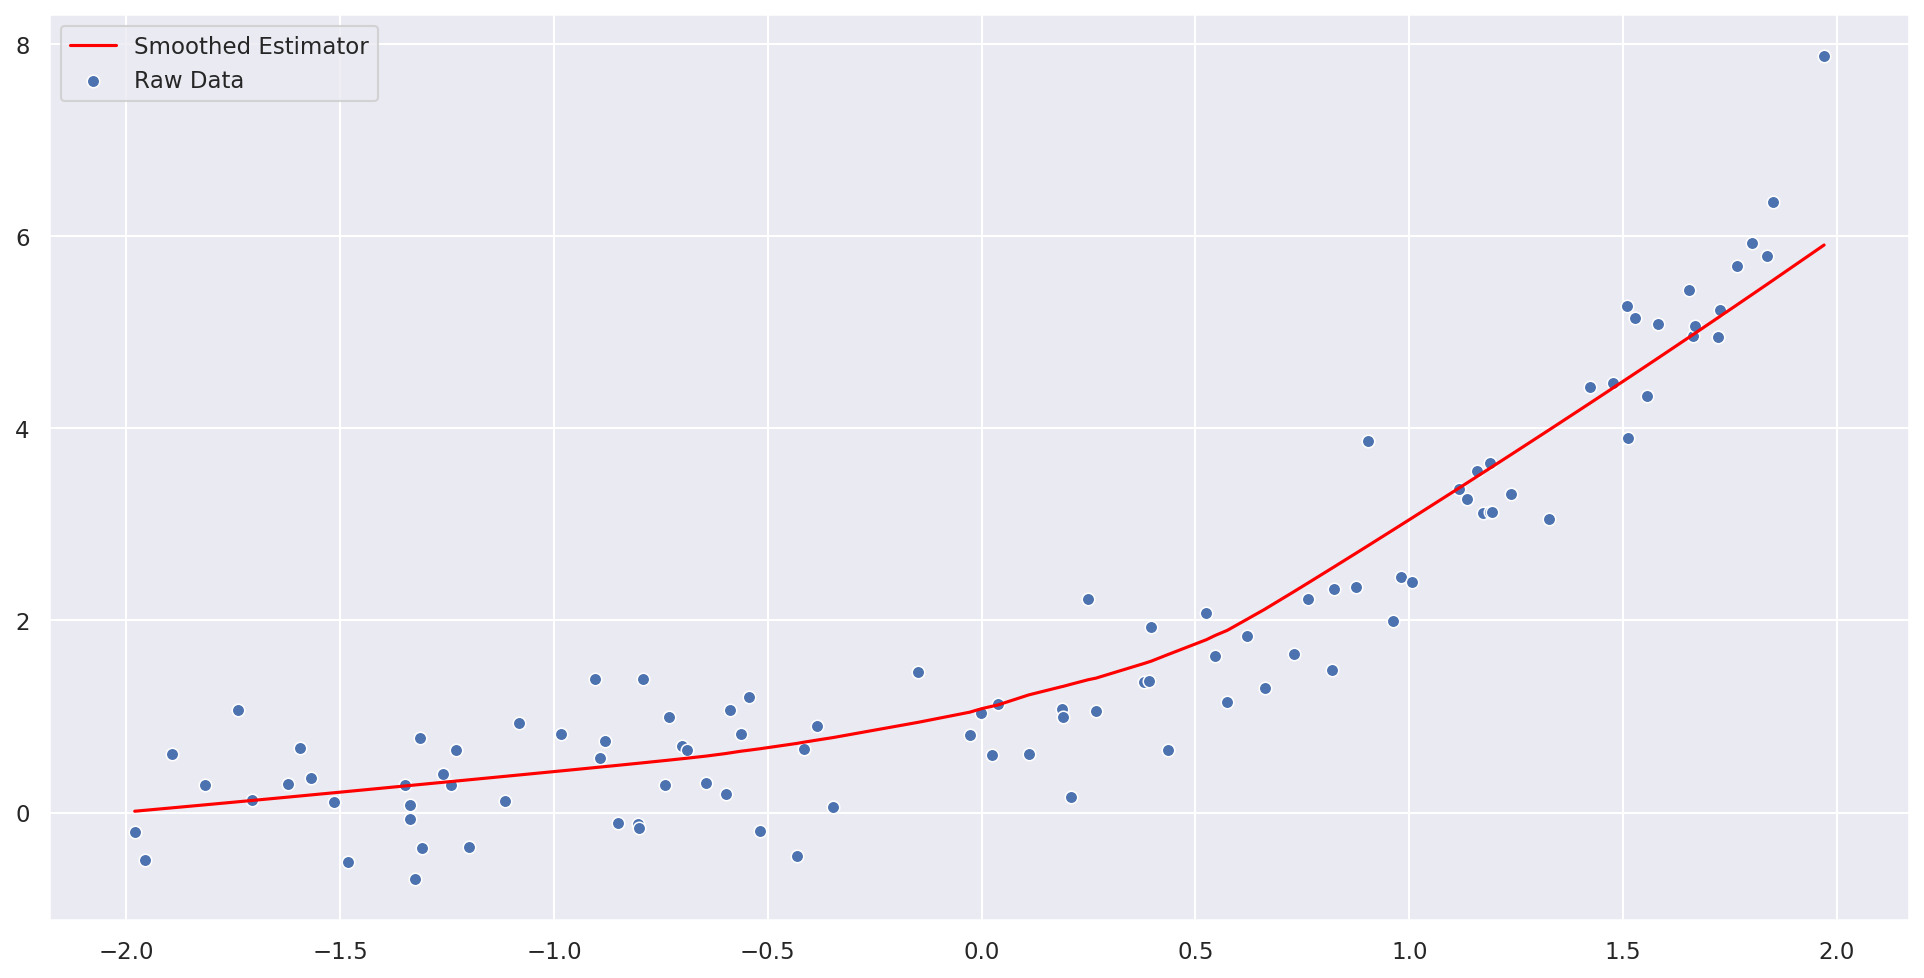

In [248]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate.

* Look at the top of this homework notebook for a description of the temperature field to know how to convert to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} * \frac{9}{5} + 32$.

Note: If you prefer plotting temperatures in Celsius, that's fine as well!
<!--
BEGIN QUESTION
name: q6b
points: 4
manual: true
-->
<!-- EXPORT TO PDF -->

Text(0.5, 1.0, 'Temperature vs Casual Rider Proportion by Weekday')

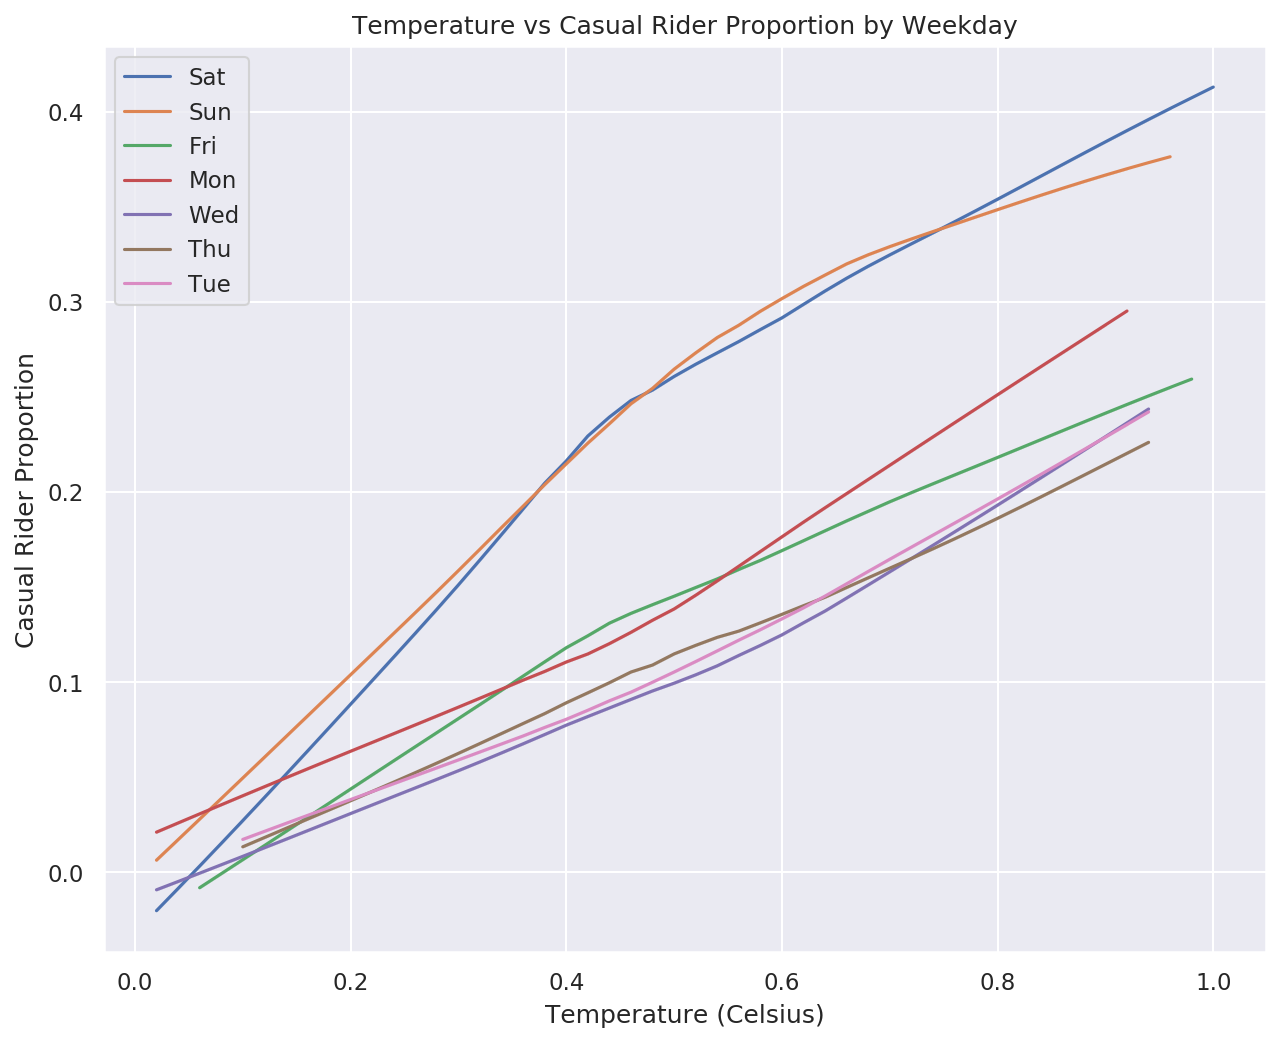

In [257]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))
#sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
#from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
bikes = bike.rename(index = str,columns = {'temp':'Temperature (Celsius)'})
weekdays = bikes['weekday'].value_counts().index.tolist()
#weekdays
for x in weekdays:
    xvalues = bikes.loc[bikes['weekday'] == x]['Temperature (Celsius)']
    yvalues = bikes.loc[bikes['weekday'] == x]['prop_casual']
    ysmooth = lowess(yvalues,xvalues,return_sorted = False)
    sns.lineplot(xvalues,ysmooth,label = x)
#xobs = np.sort(np.random.rand(100)*4.0 - 2)
#yobs = np.exp(xobs) + np.random.randn(100) / 2.0
#sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
#ysmooth = lowess(yobs, xobs, return_sorted=False)
#sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
#plt.legend();
#bike
#plt.xlabel("Ty")
plt.ylabel('Casual Rider Proportion')
plt.title('Temperature vs Casual Rider Proportion by Weekday')




#### Question 6c
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?
<!--
BEGIN QUESTION
name: q6c
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

As the temperature increase, the proportion of casual riders tend to increase as well. At around 0.4 on axis, the increase rate of the casual rider porportion tends to change, under 0.4 it increas faster than above 0.4

<img src="images/Shared-Micromobility-Across-the-U.S..png" width="600px" />

A map of areas with bike sharing systems and other forms of micro mobility as of 2018 is provided, above (Source: [NACTO](https://nacto.org/shared-micromobility-2018/))

#### Question 6d
Based on the data you have explored (distribution of orders, daily patterns, weather, additional data/information you have seen), do you think bike sharing should be realistically scaled across major cities in the the US in order to alleviate congestion, provide geographic connectivity, reduce carbon emissions, and promote inclusion among communities? Why or why not? Provide a visualisation and justify how it supports your answer
<!--
BEGIN QUESTION
name: q6d
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

In [ ]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('hw2.ipynb', 'hw2.pdf')
ok.submit()